<h2><center> 🇹🇭 ✈️ Thailand Domestic Tourism (2019-2023): Preparatory Data Science & EDA 🏝️ 🌊 </center></h2>

<h4><center> From Raw Data To Analytic Insights: Data Cleaning, Exploration, and Preparation For Future Modeling </center></h4>

### Libraries ###

In [171]:
#Backbone of the explanatory analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.figure
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import seaborn as sns

#Extension for OOP design
from abc import ABC, abstractmethod

#Extension for multiple savestates
import os

#scikit-learn Accessories
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PowerTransformer, MinMaxScaler, StandardScaler, Normalizer, LabelEncoder, OneHotEncoder

#Deprecation Warning Surpass
import warnings
warnings.filterwarnings('ignore')

#Savestates graph
plot_all = {}

### Abstract (Introduction) ###

This dataset reveals the total revenue, number of tourists and accommodation expenses with percentage and numerical means of Thailand tourism divided into geographical provinces (North, South, East, Central, East Northeast) across the year 2019 - 2023, provides a brief overview of the economic distribution in tourism at domestic - international level and investigates least-known province with subtle characteristics.

By observing the incomes at different levels, this analysis offers insights into how the tourism contributes to the Thailand's overall economy, highlights several distinctive characters make popular tourist attractions unique from the majority and indepth discussion about pandemic widespread effects during COVID-19.

### Dataset Characteristics: Uniqueness & Challenges ###

- Comprising both Thailand and English-translated version on spelling province names.
- Spanning five specified geographical regions across Thailand: North, South, East, Central, East Northeast.
- Each provinces has different revenue measurements (Occupancy rate percentage and numbers, total revenue & number of domestic and foreign visitors). However this will make the cleaning process much harder due to all-in-one features of variable column
- The currency of the value is not explicitly stated, based on the standard revenue reports conducted by agencies such as TAT, NESDC, all revenue values are assumed to be in millions of Baht (ล้านบาท) format

### Categorical Features: Key Values & Insights ###

The primary categorical column is *region_eng (similarly for region_thai)*. While this is the only explicit category over variable types, it provides meaningful insights so as to understand the distribution of each areas depending on terrain, climate and historical preservation that influence on overall tourist performance.

In [3]:
df = pd.read_csv("thailand_domestic_tourism_2019_2023.csv")
df.head(5)

,date,province_thai,province_eng,region_thai,region_eng,variable,value
0,2019-01-01,กรุงเทพมหานคร,Bangkok,ภาคกลาง,central,occupancy_rate,93.37
1,2019-01-01,ลพบุรี,Lopburi,ภาคกลาง,central,occupancy_rate,61.32
2,2019-01-01,พระนครศรีอยุธยา,Phra Nakhon Si Ayutthaya,ภาคกลาง,central,occupancy_rate,73.37
3,2019-01-01,สระบุรี,Saraburi,ภาคกลาง,central,occupancy_rate,67.33
4,2019-01-01,ชัยนาท,Chainat,ภาคกลาง,central,occupancy_rate,79.31


### Static information ###

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30800 entries, 0 to 30799
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           30800 non-null  object 
 1   province_thai  30800 non-null  object 
 2   province_eng   30800 non-null  object 
 3   region_thai    30800 non-null  object 
 4   region_eng     30800 non-null  object 
 5   variable       30800 non-null  object 
 6   value          30800 non-null  float64
dtypes: float64(1), object(6)
memory usage: 1.6+ MB


In [7]:
df.isnull().sum()

date             0
province_thai    0
province_eng     0
region_thai      0
region_eng       0
variable         0
value            0
dtype: int64

#### 1. Measurements ####

In [9]:
df["variable"].unique()

array(['occupancy_rate', 'no_tourist_occupied', 'no_tourist_all',
       'no_tourist_thai', 'no_tourist_foreign', 'net_profit_all',
       'net_profit_thai', 'net_profit_foreign'], dtype=object)

#### 2. Thailand geographical regions ####

In [11]:
df["region_eng"].unique()

array(['central', 'east', 'south', 'north', 'east_northeast'],
      dtype=object)

#### 3. Total of provinces ####

In [13]:
df["province_eng"].unique()

array(['Bangkok', 'Lopburi ', 'Phra Nakhon Si Ayutthaya ', 'Saraburi ',
       'Chainat ', 'Nakhon Pathom ', 'Sing Buri ', 'Ang Thong ',
       'Nonthaburi ', 'Pathum Thani ', 'Samut Prakan ', 'Samut Sakhon ',
       'Chachoengsao ', 'Ratchaburi ', 'Kanchanaburi ',
       'Samut Songkhram ', 'Suphan Buri ', 'Phetchaburi ',
       'Prachuap Khiri Khan ', 'Chonburi ', 'Chanthaburi ', 'Trat ',
       'Nakhon Nayok ', 'Prachinburi ', 'Rayong ', 'Sa Kaeo ', 'Phuket ',
       'Phatthalung ', 'Trang ', 'Ranong ', 'Chumphon ', 'Pattani ',
       'Yala ', 'Nakhon Si Thammarat ', 'Narathiwat ', 'Krabi ',
       'Songkhla ', 'Phang Nga ', 'Surat Thani ', 'Satun ',
       'Kamphaeng Phet ', 'Chiang Rai ', 'Chiang Mai ', 'Phichit ',
       'Nakhon Sawan ', 'Tak ', 'Phitsanulok ', 'Phayao ', 'Phetchabun ',
       'Phrae ', 'Lampang ', 'Lamphun ', 'Mae Hong Son ', 'Uttaradit ',
       'Uthai Thani ', 'Sukhothai ', 'Nan ', 'Kalasin ', 'Khon Kaen ',
       'Chaiyaphum ', 'Nakhon Phanom ', 'Nakhon Ratch

### Feature Engineering & Data Cleaning ###

Notes: Since there are different grouped-categories, it's best to perform data cleaning on each specific regions, based on the following groups below:

- no_tourist_all, no_tourist_thai, no_tourist_foreign, no_tourist_occupied
- occupancy_rate
- revenue_all, revenue_foreign, revenue_thai

Each columns must go through ordinal data cleaning process: 
1. Handling NaN / missing values (Passed since non of numerical values are errors)
2. Detecting and removing outliers
3. Duplicated values detection

Furthermore, the date column will be stripped into numerical ones for wrangling convenience.

#### 1. Simple Date Format ####

In [15]:
df["date"] = pd.to_datetime(df['date'])

df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

#Reorder the dataframe
cols = df.columns.to_list()

new_order = ["date", "day", "month", "year"] + [col for col in cols if col not in ["day", "month", "year", "date"]]
df = df[new_order]
df

,date,day,month,year,province_thai,province_eng,region_thai,region_eng,variable,value
0,2019-01-01,1,1,2019,กรุงเทพมหานคร,Bangkok,ภาคกลาง,central,occupancy_rate,93.37
1,2019-01-01,1,1,2019,ลพบุรี,Lopburi,ภาคกลาง,central,occupancy_rate,61.32
2,2019-01-01,1,1,2019,พระนครศรีอยุธยา,Phra Nakhon Si Ayutthaya,ภาคกลาง,central,occupancy_rate,73.37
3,2019-01-01,1,1,2019,สระบุรี,Saraburi,ภาคกลาง,central,occupancy_rate,67.33
4,2019-01-01,1,1,2019,ชัยนาท,Chainat,ภาคกลาง,central,occupancy_rate,79.31
...,...,...,...,...,...,...,...,...,...,...
30795,2022-12-01,1,12,2022,อุบลราชธานี,Ubon Ratchathani,ภาคตะวันออกเฉียงเหนือ,east_northeast,net_profit_foreign,2.48
30796,2022-12-01,1,12,2022,สกลนคร,Sakon Nakhon,ภาคตะวันออกเฉียงเหนือ,east_northeast,net_profit_foreign,3.52
30797,2022-12-01,1,12,2022,ยโสธร,Yasothon,ภาคตะวันออกเฉียงเหนือ,east_northeast,net_profit_foreign,0.21
30798,2022-12-01,1,12,2022,อำนาจเจริญ,Amnat Charoen,ภาคตะวันออกเฉียงเหนือ,east_northeast,net_profit_foreign,0.66


#### 2. Ordinal Data Cleaning Procedure ####

#### Brief overview of numeric display on certain rates ####

In [17]:
#Percentage of accommodations
occ_rate = df[df["variable"] == "occupancy_rate"]

#Number of accommodations (Rescaled into hundred thousand format for convenience)
no_occ = df[df["variable"] == "no_tourist_occupied"]

#Revenue
net_all = df[df["variable"] == "net_profit_all"]
net_thai = df[df["variable"] == "net_profit_thai"]
net_foreign = df[df["variable"] == "net_profit_foreign"]

#Number of tourists
no_all = df[df["variable"] == "no_tourist_all"]
no_foreign = df[df["variable"] == "no_tourist_foreign"]
no_thai = df[df["variable"] == "no_tourist_thai"]

In [111]:
no_all

,date,day,month,year,province_thai,province_eng,region_thai,region_eng,variable,value
7700,2019-01-01,1,1,2019,กรุงเทพมหานคร,Bangkok,ภาคกลาง,central,no_tourist_all,5959075.0
7701,2019-01-01,1,1,2019,ลพบุรี,Lopburi,ภาคกลาง,central,no_tourist_all,268664.0
7702,2019-01-01,1,1,2019,พระนครศรีอยุธยา,Phra Nakhon Si Ayutthaya,ภาคกลาง,central,no_tourist_all,730329.0
7703,2019-01-01,1,1,2019,สระบุรี,Saraburi,ภาคกลาง,central,no_tourist_all,207236.0
7704,2019-01-01,1,1,2019,ชัยนาท,Chainat,ภาคกลาง,central,no_tourist_all,79073.0
...,...,...,...,...,...,...,...,...,...,...
11545,2022-12-01,1,12,2022,อุบลราชธานี,Ubon Ratchathani,ภาคตะวันออกเฉียงเหนือ,east_northeast,no_tourist_all,198206.0
11546,2022-12-01,1,12,2022,สกลนคร,Sakon Nakhon,ภาคตะวันออกเฉียงเหนือ,east_northeast,no_tourist_all,147162.0
11547,2022-12-01,1,12,2022,ยโสธร,Yasothon,ภาคตะวันออกเฉียงเหนือ,east_northeast,no_tourist_all,37251.0
11548,2022-12-01,1,12,2022,อำนาจเจริญ,Amnat Charoen,ภาคตะวันออกเฉียงเหนือ,east_northeast,no_tourist_all,22573.0


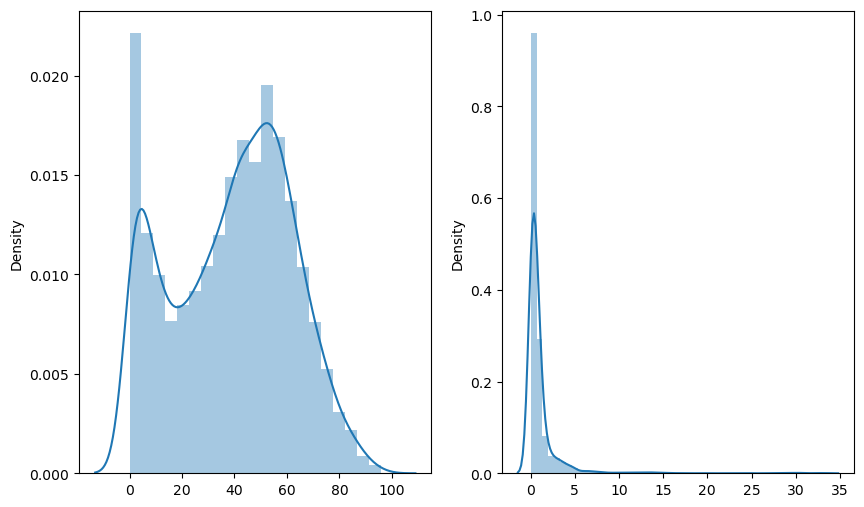

In [19]:
#Hotel accommodations
plt.figure(figsize = (10, 6))
plt.subplot(1,2,1)
sns.distplot(x = occ_rate["value"], kde = True)
plt.subplot(1,2,2)
sns.distplot(x = no_occ["value"] / 100000, kde = True)
plt.show()

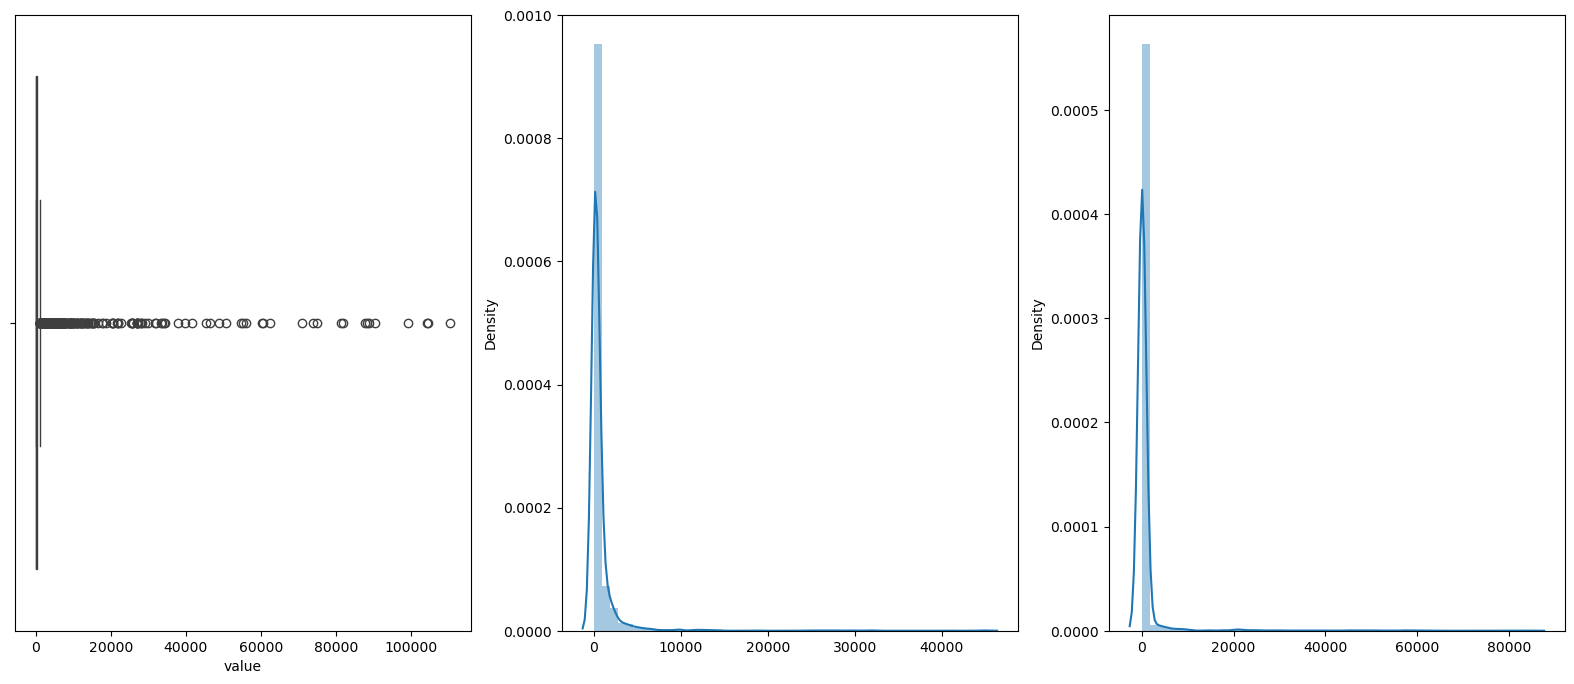

In [21]:
#Revenue
plt.figure(figsize = (20, 8))
plt.subplot(1,3,1)
sns.boxplot(x = net_all["value"])
plt.subplot(1,3,2)
sns.distplot(x = net_thai["value"], kde = True)
plt.subplot(1,3,3)
sns.distplot(x = net_foreign["value"], kde = True)
plt.show()

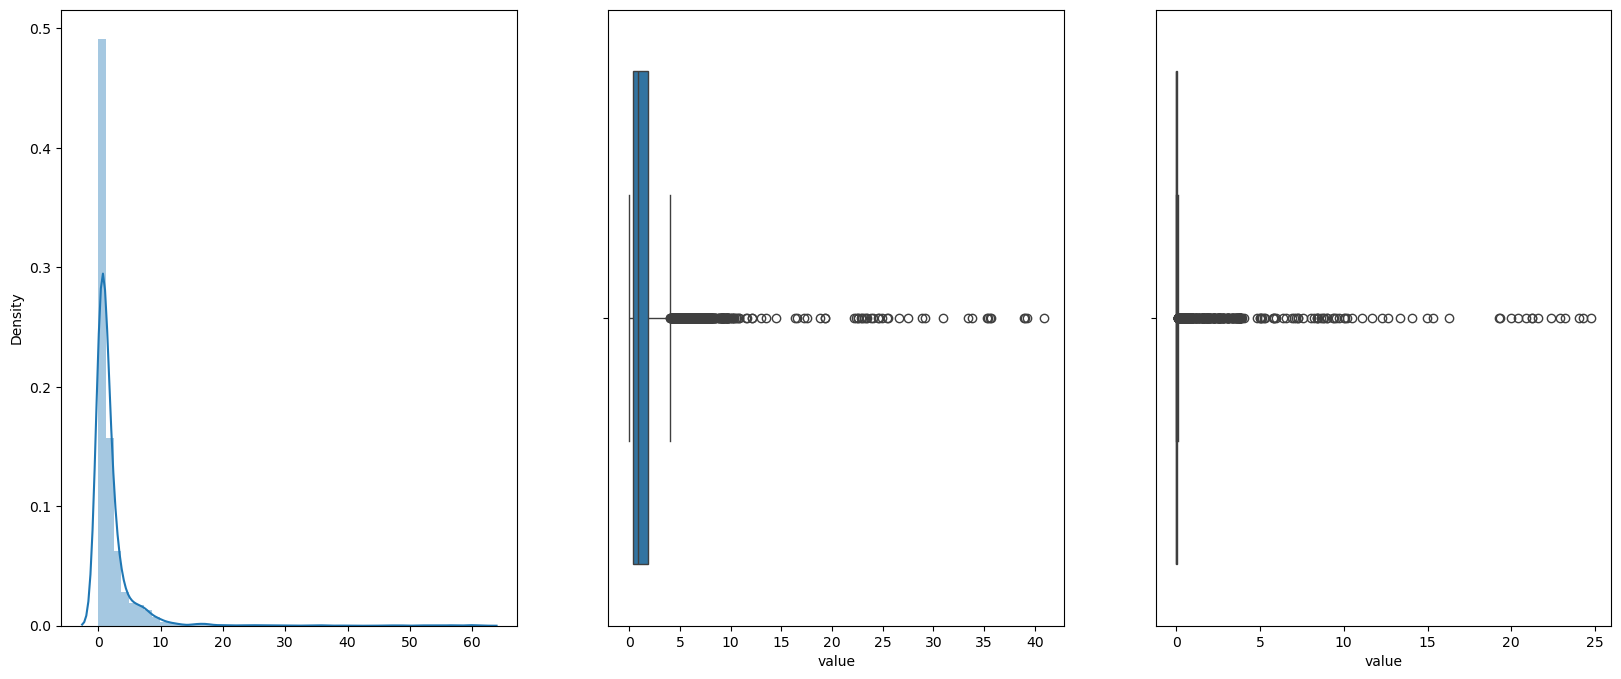

In [23]:
#Number of tourists
plt.figure(figsize = (20, 8))
plt.subplot(1,3,1)
sns.distplot(x = no_all["value"] / 100000)
plt.subplot(1,3,2)
sns.boxplot(x = no_thai["value"] / 100000)
plt.subplot(1,3,3)
sns.boxplot(x = no_foreign["value"] / 100000)
plt.show()

#### Detecting & Removing Outliers ####

In [25]:
#pandas.api.types.is_numeric_dtype: Check whether the provided array or dtype is of a numeric dtype.

# Base class for outlier removal
class OutlierRemover:
    def __init__(self, df, group_cols, value_cols):
        self.df = df
        self.group_cols = group_cols
        self.value_cols = value_cols

    def remove_outliers(self):
        raise NotImplementedError("Subclasses should implement this method")

# IQR-based outlier remover
class IQROutlierRemover(OutlierRemover):
    def remove_outliers(self):
        cleaned_df = pd.DataFrame()
        for region, sub_df in self.df.groupby(self.group_cols):
            if pd.api.types.is_numeric_dtype(sub_df[self.value_cols]):
                q1 = sub_df[self.value_cols].quantile(0.25)
                q3 = sub_df[self.value_cols].quantile(0.75)
                iqr = q3 - q1
                max_iqr = q3 + 1.5 * iqr
                min_iqr = q1 - 1.5 * iqr
                mask = (sub_df[self.value_cols] <= max_iqr) & (sub_df[self.value_cols] >= min_iqr)
                cleaned_subdf = sub_df[mask]
                cleaned_df = pd.concat([cleaned_df, cleaned_subdf], ignore_index=True)
        return cleaned_df

# Z-score-based outlier remover
class ZScoreOutlierRemover(OutlierRemover):
    def remove_outliers(self):
        cleaned_df = pd.DataFrame()
        for region, sub_df in self.df.groupby(self.group_cols):
            sub_df = sub_df.copy()
            for column in self.value_cols:
                if pd.api.types.is_numeric_dtype(sub_df[column]):
                    z = (sub_df[column] - sub_df[column].mean()) / sub_df[column].std()
                    prefix = f"z_{column}"
                    sub_df[prefix] = z
                    sub_df = sub_df[z.abs() < 3]  # Keep rows with Z-scores less than 3
            cleaned_df = pd.concat([cleaned_df, sub_df], ignore_index=True)
        return cleaned_df

# DataProcessor class that uses outlier removal strategies
class DataProcessor:
    def __init__(self, df, group_cols, value_cols):
        self.df = df
        self.group_cols = group_cols
        self.value_cols = value_cols

    def apply_outlier_removal(self, method='iqr'):
        if method == 'iqr':
            remover = IQROutlierRemover(self.df, self.group_cols, self.value_cols)
        elif method == 'zscore':
            remover = ZScoreOutlierRemover(self.df, self.group_cols, self.value_cols)
        else:
            raise ValueError(f"Outlier removal method {method} is not recognized.")
        
        return remover.remove_outliers()

# Example usage
no_all_cleaned = DataProcessor(no_all, "region_eng", "value").apply_outlier_removal(method='iqr')
no_thai_cleaned = DataProcessor(no_thai, "region_eng", "value").apply_outlier_removal(method='iqr')
no_foreign_cleaned = DataProcessor(no_foreign, "region_eng", "value").apply_outlier_removal(method='iqr')

net_all_cleaned = DataProcessor(net_all, "region_eng", "value").apply_outlier_removal(method='iqr')
net_thai_cleaned = DataProcessor(net_thai, "region_eng", "value").apply_outlier_removal(method='iqr')
net_foreign_cleaned = DataProcessor(net_foreign, "region_eng", "value").apply_outlier_removal(method='iqr')

no_tourist_occupied_clean = DataProcessor(no_occ, "region_eng", "value").apply_outlier_removal(method='iqr')

#### Duplicated Values Detection ####

In [27]:
datasets = {
    "no_all_cleaned": no_all_cleaned,
    "no_thai_cleaned": no_thai_cleaned,
    "no_foreign_cleaned": no_foreign_cleaned,
    "net_all_cleaned": net_all_cleaned,
    "net_thai_cleaned": net_thai_cleaned,
    "net_foreign_cleaned": net_foreign_cleaned,
    "no_tourist_occupied_clean": no_tourist_occupied_clean,
}

for name, df in datasets.items():
    num_duplicates = df.duplicated().sum()
    print(f"{name}: {num_duplicates} duplicate row(s) found.")

no_all_cleaned: 0 duplicate row(s) found.
no_thai_cleaned: 0 duplicate row(s) found.
no_foreign_cleaned: 0 duplicate row(s) found.
net_all_cleaned: 0 duplicate row(s) found.
net_thai_cleaned: 0 duplicate row(s) found.
net_foreign_cleaned: 0 duplicate row(s) found.
no_tourist_occupied_clean: 0 duplicate row(s) found.


*No duplicated values is found, thereby skip this process*

#### 3. Feature Engineering (Preparatory EDA) ####

In [108]:
#Rescale values (only for EDA)
def rescale_values_label(y):
    """
    Convert from decimal year into formal format: Mid-2020, Mid-2021
    """
    if y % 1 == 0:
        return str(int(y))
    elif y % 1 == 0.5:
        return f"Mid-{int(y)}"
    else:
        return str(y) #alternative use

class FTEngineering:
    def __init__(self, occ_rate_df, no_occ_df, provinces):
        self.occ_rate_df = occ_rate_df
        self.no_occ_df = no_occ_df
        self.provinces = provinces
        self.occ_rate_by_province = {}
        self.no_all_by_province = {}
        self.avg_occ_rate_by_province = {}
        self.avg_no_all_by_province = {}
        
    #Task 1
    def preprocess_provinces(self):
        for prov in provinces:
            #Initially strip all occ_rate data frame into distinctive province label
            self.occ_rate_by_province[prov] = self.occ_rate_df[self.occ_rate_df["province_eng"].str.strip() == prov]
            self.no_all_by_province[prov] = self.no_occ_df[self.no_occ_df["province_eng"].str.strip() == prov]

            #Reassign into avg_occ & avg_no with mean measurement per year
            self.avg_occ_rate_by_province[prov] = self.occ_rate_by_province[prov].groupby("year")["value"].mean().reset_index().rename(columns = {"value" : "avg_occ_rate"})
            self.avg_no_all_by_province[prov] = self.no_all_by_province[prov].groupby("year")["value"].mean().reset_index().rename(columns = {"value" : "avg_tourists"})

    def get_all_province_data(self):
        return {
            "occ_rate_by_province": self.occ_rate_by_province,
            "no_all_by_province": self.no_all_by_province,
            "avg_occ_rate_by_province": self.avg_occ_rate_by_province,
            "avg_no_all_by_province": self.avg_no_all_by_province
        }
    
    #Task 2
    @staticmethod
    def group_filter(df, years, group_by, value_col = "value", new_col_name = "total", extra_cols = None):
        #Sort all columns within year allowance
        filtered = df[df["year"].isin(years)]
        grouped = (filtered.groupby(group_by)[value_col].sum().reset_index().rename(columns={value_col: new_col_name}))
        if extra_cols:
            for key, value in extra_cols.items():
                grouped[key] = value
        return grouped

    @staticmethod
    def summarize_quarter_data(df, start_year, end_year, scale):
        #Safety duplication
        df_filtered = df[(df["year"] >= start_year) & (df["year"] <= end_year)].copy()
        df_filtered["quarter"] = df_filtered["date"].dt.to_period("Q").astype(str)
        summary = df_filtered.groupby("quarter")["value"].sum().reset_index()
        summary["value"] = summary["value"] / scale
        return summary

    #Task 3
    @staticmethod
    def get_total_metric_by_year(df, province_name, years, col_name = "value", result_col_name = "total"):
        filtered = df[df["province_eng"].str.strip() == province_name]
        filtered = filtered[filtered["year"].isin(years)]
        total_by_year = (filtered.groupby("year")["value"].sum().reset_index().rename({col_name : result_col_name}))
        return total_by_year            

In [110]:
# Task 1
provinces = ["Chiang Rai", "Chiang Mai", "Bangkok", "Phuket"]
processor = FTEngineering(occ_rate, no_occ, provinces)
processor.preprocess_provinces()

province_data = processor.get_all_province_data()

occ_rate_by_province = province_data["occ_rate_by_province"]
no_all_by_province = province_data["no_all_by_province"]
avg_occ_rate_by_province = province_data["avg_occ_rate_by_province"]
avg_no_all_by_province = province_data["avg_no_all_by_province"]

#Task 2
years = [2019, 2020, 2021, 2022, 2023]
total_revenue = processor.group_filter(net_all_cleaned, years, ["year"], new_col_name="total_revenue")
total_visitors = processor.group_filter(no_all_cleaned, years, ["year"], new_col_name="total_visitors")

# Quarter-based summary (COVID period)
foreign_revenue_summary = processor.summarize_quarter_data(net_foreign_cleaned, 2020, 2021, scale=1000)
occupation_summary = processor.summarize_quarter_data(no_tourist_occupied_clean, 2020, 2021, scale=1000)

#Task 3
# Combine tourists and revenue
no_thai_grouped = processor.group_filter(no_thai_cleaned, years, ["year", "region_eng"], extra_cols={"tourist_type": "Thai", "metric": "Number"})
no_foreign_grouped = processor.group_filter(no_foreign_cleaned, years, ["year", "region_eng"], extra_cols={"tourist_type": "Foreign", "metric": "Number"})

net_thai_grouped = processor.group_filter(net_thai_cleaned, years, ["year", "region_eng"], extra_cols={"tourist_type": "Thai", "metric": "Revenue"})
net_foreign_grouped = processor.group_filter(net_foreign_cleaned, years, ["year", "region_eng"], extra_cols={"tourist_type": "Foreign", "metric": "Revenue"})

full_combined = pd.concat([no_thai_grouped, no_foreign_grouped, net_thai_grouped, net_foreign_grouped], ignore_index=True)

#Task 4
# Uthai Thani totals
thai_visitors_uthani = processor.get_total_metric_by_year(no_thai_cleaned, "Uthai Thani", years, result_col_name="total_visitors")
foreign_revenue_uthani = processor.get_total_metric_by_year(net_foreign_cleaned, "Uthai Thani", years, result_col_name="total_revenue")

### Explanatory Data Analysis (Discussion) ###

With this well-prepared data pipelines, normally questions and observations are given as procedures to investigate the tourism situation in Thailand in three stages: Pre-pandemic, COVID-19 and post-pandemic, rather than giving out questions, this dataset will be shifted toward theme-based tasks, which particularises selective steps.

Regarding famous tourist attractions, several provinces are selected based on prominence, attractive scenic beauty and targetted majority. In contrary, some of least well-known provinces are also in the exploration.

*1. Foreign tourist attractions: Chiang Rai, Chiang Mai, Bangkok, Phuket*

*2. Domestic tourist attraction: Uthai Thani*

**Task 1: Tourist Accommodations**
+ Visualise the occupancy rate (%) of famous foreign tourism attractions 
+ Visualise the tourist hotels of foreign tourism attractions

→ **_Does the reputation (culture, food, history) affect (positively or negatively) to the accommodation price and quantity?_**

**Task 2: Revenue Classification: Domestic, Foreign and Total**
+ Visualise the total revenue (all) of Thailand, total guests visiting over 2019 - 2023

→ **_What significant factors contribute to Thailand's attractiveness as a tourist destination?_**
+ Deep dive into the decline during pandemic COVID - 19, comparing the total revenue in year 2020 - 2021 of all foreign tourist attractions

→ **_Analyze the impact of COVID-19 on occupancy rates and social aspects (E.g: business closures, economics, etc)_**

**Task 3: Regional Differences**
+ Visualise the revenue of following areas (Thai and Foreign)
+ Visualise the no. of Thai and Foreign visitors

→ **_To what extend do regional differences influence on tourism revenue and how each regional area profiles vary towards tourist preferences?_**

**Task 4: The Hidden Gem**

_Uthai Thani_ is not well-known by large proportion of international visitors due to the remote geographical location. Nevertheless, it still proceeds to attract significant amount of domestic tourists. Analyze the revenue yieled by Thai and Foreign sources in the time of 2019 - 2023, number of guests visited _(Thai v.s Foreign)_ during that time, address and discuss _possible aspects_ that makes the province a hidden gem. 

#### Task 1: Tourist Accommodations ####

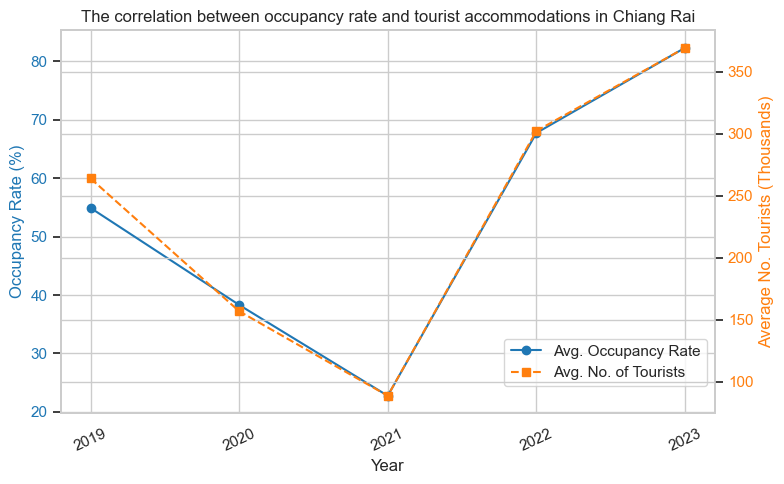

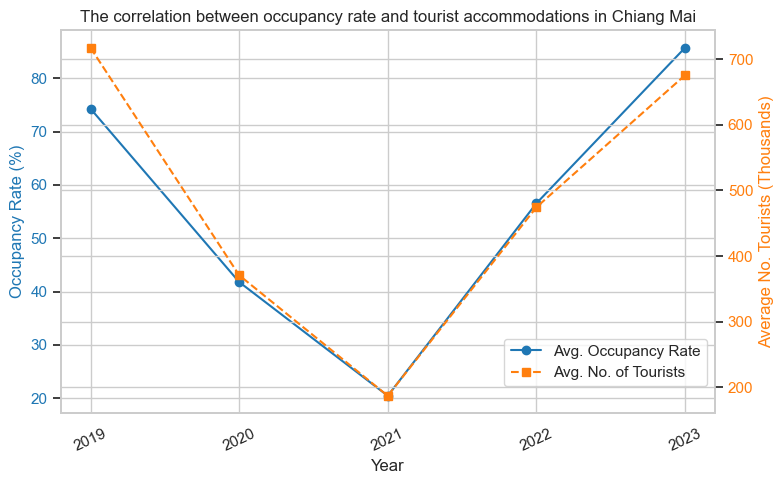

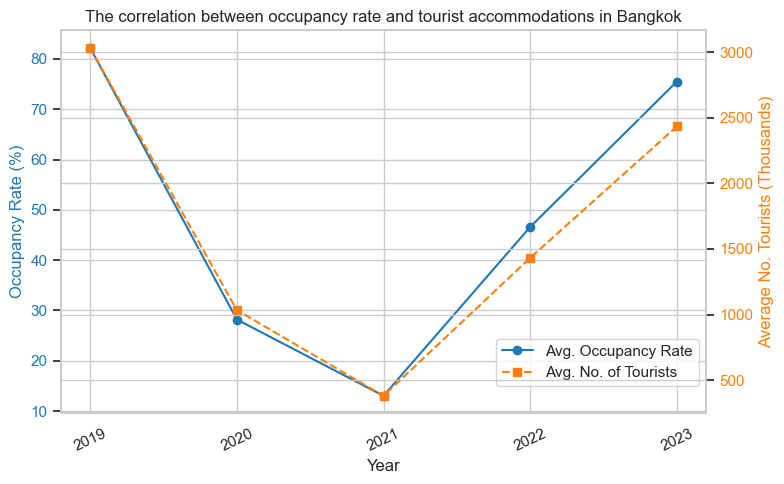

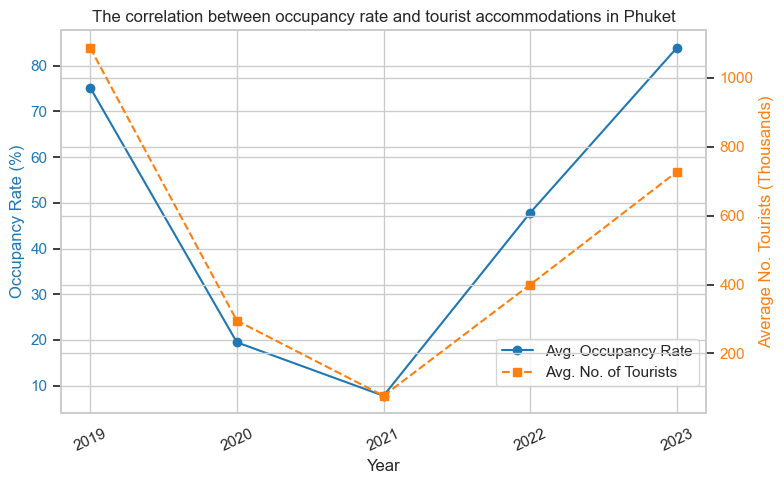

In [112]:
for prov in provinces:
    occ_data = avg_occ_rate_by_province[prov].sort_values("year")
    no_data = avg_no_all_by_province[prov].sort_values("year").copy()

    #Rescale data into thousands for convenient display
    no_data["avg_tourists"] = no_data["avg_tourists"] / 1000
    
    fig, ax1 = plt.subplots(figsize=(8, 5))

    # Plot occupancy rate on the primary y-axis
    ax1.set_title(f"The correlation between occupancy rate and tourist accommodations in {prov}")
    ax1.set_xlabel("Year")
    ax1.set_ylabel("Occupancy Rate (%)", color="tab:blue")
    ax1.plot(occ_data["year"], occ_data["avg_occ_rate"], color="tab:blue", marker="o", label="Avg. Occupancy Rate")
    ax1.tick_params(axis="y", labelcolor="tab:blue")

    #Formatted-year ticks for better visual aids
    formatted_years = [rescale_values_label(y) for y in occ_data["year"]]
    ax1.set_xticks(occ_data["year"])
    ax1.set_xticklabels(formatted_years, rotation = 25)
    
    # Secondary y-axis for number of tourists
    ax2 = ax1.twinx()
    ax2.set_ylabel("Average No. Tourists (Thousands)", color="tab:orange")
    ax2.plot(no_data["year"], no_data["avg_tourists"], color="tab:orange", marker="s", linestyle="--", label="Avg. No. of Tourists")
    ax2.tick_params(axis="y", labelcolor="tab:orange")

    # Combine legends from both axes
    lines_1, labels_1 = ax1.get_legend_handles_labels()
    lines_2, labels_2 = ax2.get_legend_handles_labels()
    ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc="lower right", bbox_to_anchor=(1, 0.05))

    plt.grid(True)
    plt.tight_layout()

    plot_all[f"revenue_tourist_{prov}_plot"] = fig
    
    plt.show()

#### Task 2: Revenue Classification: Domestic, Foreign and Total ####

#### 1. The Big Picture ####

<Figure size 800x500 with 0 Axes>

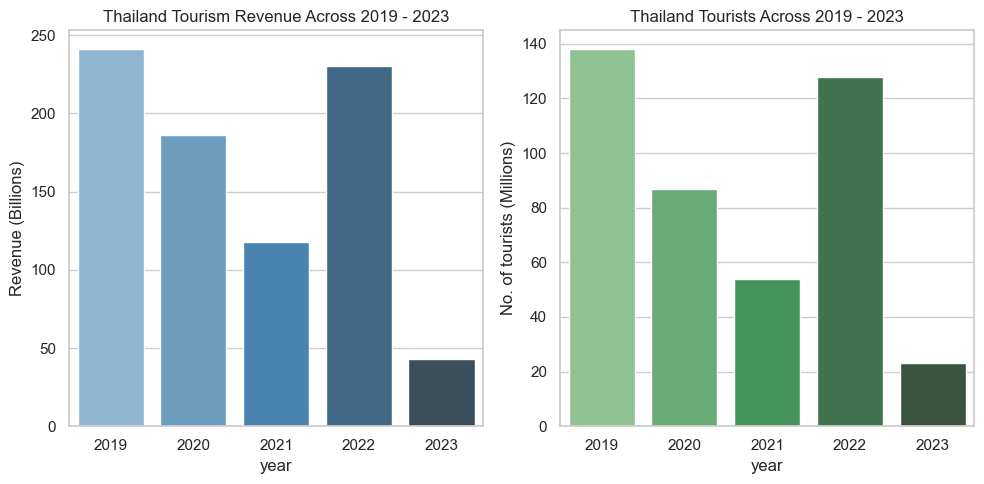

In [114]:
#Make copies for safety rescaling features
plot_revenue = total_revenue_by_year.copy()
plot_revenue["total_revenue"] /= 1000

plot_visitors = total_visitors_by_year.copy()
plot_visitors["total_visitors"] /= 1000000

#Visualisation
plt.figure(figsize = (8, 5))
fig, (axs1, axs2) = plt.subplots(1, 2, figsize = (10, 5))

#Total revenue
sns.barplot(x = "year", y = "total_revenue", data = plot_revenue, ax = axs1, palette="Blues_d")
axs1.set_title("Thailand Tourism Revenue Across 2019 - 2023")
axs1.set_ylabel("Revenue (Billions)")

#Total visitors
sns.barplot(x = "year", y = "total_visitors", data = plot_visitors, ax = axs2, palette="Greens_d")
axs2.set_title("Thailand Tourists Across 2019 - 2023")
axs2.set_ylabel("No. of tourists (Millions)")

plt.tight_layout()

plot_all["revenue_tourist_plot"] = fig

plt.show()

#### 2. COVID-19 ERA ####

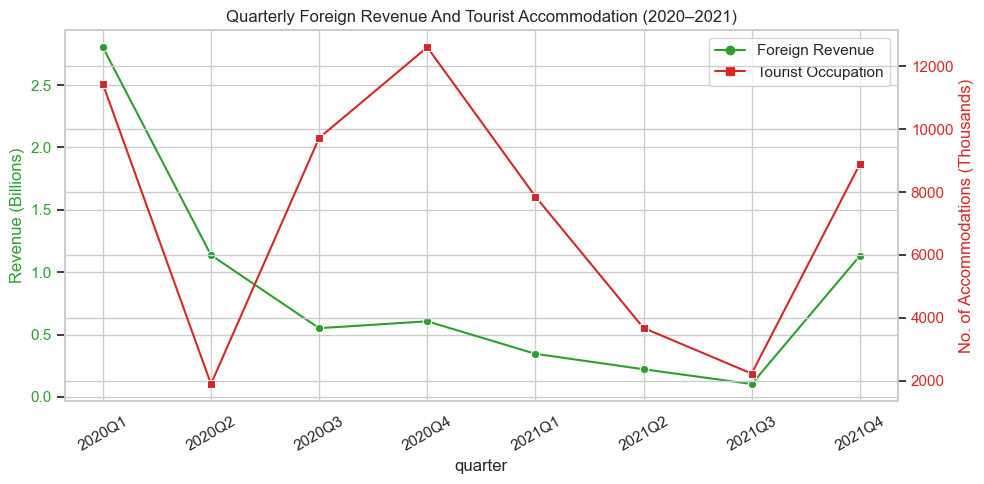

In [116]:
#COVID-19 ERA Quarterly Trends (2020 - 2021)
fig, ax1 = plt.subplots(figsize=(10, 5))

sns.lineplot(x="quarter", y="value", data=foreign_revenue_summary, marker="o", ax=ax1, color="tab:green", legend=False)
ax1.set_ylabel("Revenue (Billions)", color="tab:green")
ax1.tick_params(axis="y", labelcolor="tab:green")
ax1.set_title("Quarterly Foreign Revenue And Tourist Accommodation (2020–2021)")
ax1.set_xticklabels(foreign_revenue_summary["quarter"], rotation=30)

# Secondary axis
ax2 = ax1.twinx()
sns.lineplot(x="quarter", y="value", data=occupation_summary, marker="s", ax=ax2, color="tab:red", legend=False)
ax2.set_ylabel("No. of Accommodations (Thousands)", color="tab:red")
ax2.tick_params(axis="y", labelcolor="tab:red")

# Custom legend 
lines = [
    plt.Line2D([], [], color="tab:green", marker="o", label="Foreign Revenue"),
    plt.Line2D([], [], color="tab:red", marker="s", label="Tourist Occupation")
]
ax1.legend(handles=lines, loc="upper right")

plt.tight_layout()
plt.grid(True)

plot_all["covid_19_plot"] = fig

plt.show()


#### Task 3: Regional Differences ####

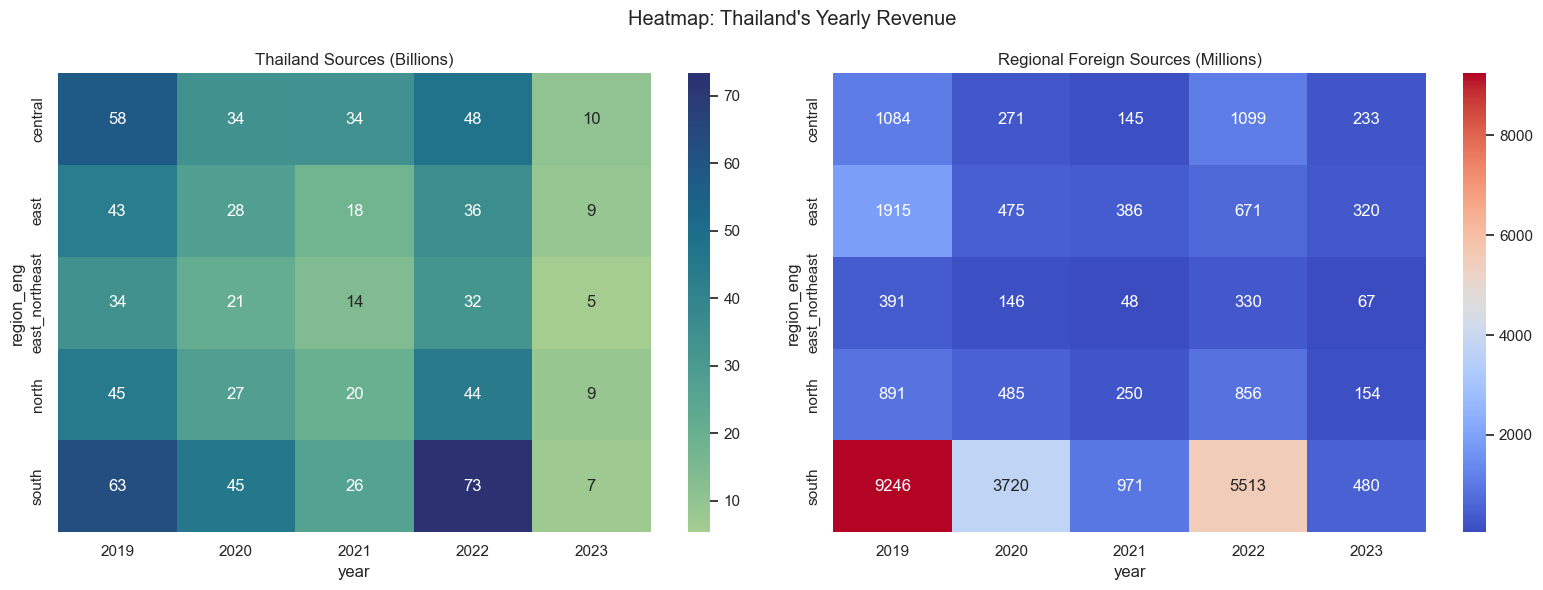

In [118]:
#Revenue (Billions Format)

#Safe copy for further modifications
net_thai_scaled = net_thai_grouped.copy()
net_foreign_scaled = net_foreign_grouped.copy()

#Scale in billions format
net_thai_scaled["total"] = net_thai_scaled["total"] / 1000

net_thai_pivot = net_thai_scaled.pivot(index="region_eng", columns="year", values="total")
net_foreign_pivot = net_foreign_scaled.pivot(index="region_eng", columns="year", values="total")

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.heatmap(net_thai_pivot, annot=True, fmt=".0f", cmap="crest", ax=axes[0])
axes[0].set_title("Thailand Sources (Billions)")

sns.heatmap(net_foreign_pivot, annot=True, fmt=".0f", cmap="coolwarm", ax=axes[1])
axes[1].set_title("Regional Foreign Sources (Millions)")

plt.suptitle("Heatmap: Thailand's Yearly Revenue")
plt.tight_layout()

plot_all["regional_heatmap_revenue"] = fig

plt.show()

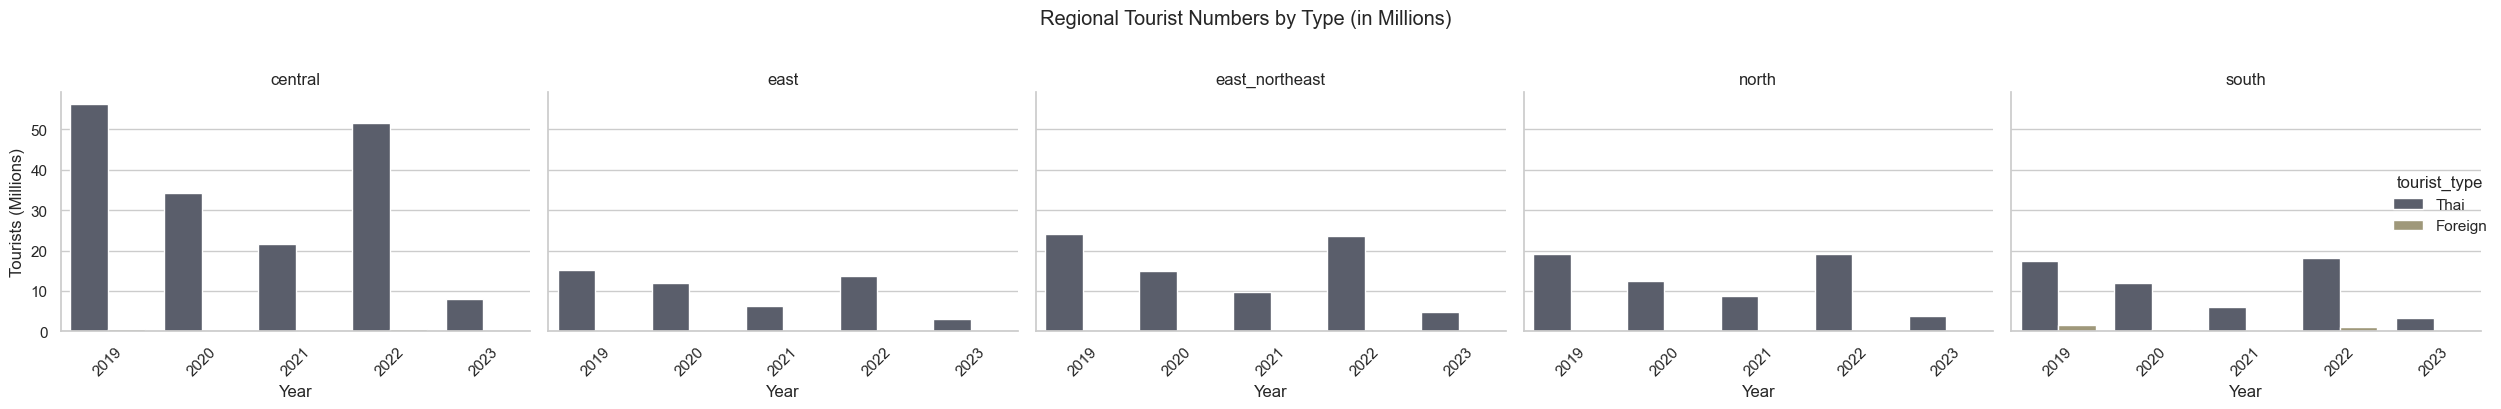

In [120]:
#Tourists in millions
no_thai_scaled = no_thai_grouped.copy()
no_foreign_scaled = no_foreign_grouped.copy()

no_thai_scaled["total"] = no_thai_scaled["total"] / 1000000
no_foreign_scaled["total"] = no_foreign_scaled["total"] / 1000000

no_all_scaled = pd.concat([no_thai_scaled, no_foreign_scaled], ignore_index = True)

g = sns.catplot(data = no_all_scaled, x = "year", y = "total", hue = "tourist_type", col = "region_eng", kind = "bar", height = 4, aspect = 1.2, palette = "cividis")
g.set_axis_labels("Year", "Tourists (Millions)")
g.set_titles("{col_name}")
g.set_xticklabels(rotation=45)
g.fig.suptitle("Regional Tourist Numbers by Type (in Millions)", y=1.02)

plt.tight_layout()
plot_all["regional_tourists_by_year"] = g.fig

plt.show()

#### Task 4: The Hidden Gem ####

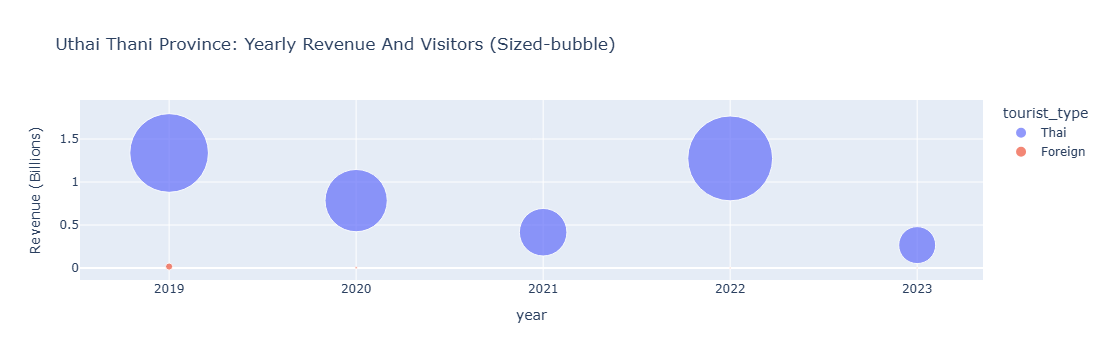

In [126]:
# Rename columns for clarity
total_thai_uthani_copy = total_thai_uthani.copy().rename(columns={"value": "total_visitors"})
total_foreign_uthani_copy = total_foreign_uthani.copy().rename(columns={"value": "total_visitors"})

total_revenue_thai_uthani_copy = total_revenue_thai_uthani.copy().rename(columns={"value": "total_revenue"})
total_revenue_foreign_uthani_copy = total_revenue_foreign_uthani.copy().rename(columns={"value": "total_revenue"})

#Add tourist type column
total_thai_uthani_copy["tourist_type"] = "Thai"
total_foreign_uthani_copy["tourist_type"] = "Foreign"

total_revenue_thai_uthani_copy["tourist_type"] = "Thai"
total_revenue_foreign_uthani_copy["tourist_type"] = "Foreign"

# Merge revenue with visitor data
thai_combined = pd.merge(total_thai_uthani_copy, total_revenue_thai_uthani_copy, on=["year", "tourist_type"])
foreign_combined = pd.merge(total_foreign_uthani_copy, total_revenue_foreign_uthani_copy, on=["year", "tourist_type"])

# Combine both tourist types
bubble_data = pd.concat([thai_combined, foreign_combined], ignore_index=True)

#Bubble Data Scalability
bubble_data["total_revenue"] = bubble_data["total_revenue"] / 1000 
bubble_data["total_visitors"] = bubble_data["total_visitors"] / 1000000

g = px.scatter(bubble_data, x="year", y="total_revenue", size="total_visitors", color="tourist_type", hover_name="tourist_type", size_max=60,
    labels={
        "total_revenue": "Revenue (Billions)",
        "total_visitors": "Visitors (Millions)"
    },
    title="Uthai Thani Province: Yearly Revenue And Visitors (Sized-bubble)"
)

g.update_layout(xaxis=dict(dtick=1))

g.show()

### Data Preprocessing ###

Finalizing the storytelling with robust procedures to ensure datasets are ready for further Machine Learning tasks, potentially serving as input for artificial intelligence algorithms. This process involves the following steps:

- Simple Date Format (Previously Done)
- Feature Compilation
- Preliminary Descriptive Feature Removal
- Feature Encoding
- Feature Transformation
- Feature Scaling

#### Feature Compilation ####

Emerge all distinctive cleaned sub-dataframes into a well-cleaned one, substantially most preprocessing tasks rely on the final version.

In [128]:
class DataCompilation:
    def __init__(self, no_dataFrame, net_dataFrame, tourist_data):
        self.no_dataFrame = no_dataFrame
        self.net_dataFrame = net_dataFrame
        self.tourist_data = tourist_data

    def emerge(self, frames):
        #Initialization of empty DataFrame
        merged_df = pd.DataFrame()

        #Iterating the insertion of each labels ("all", "thai", "foreign")
        for frame in frames:
            #Retrieve all copied declared dataframes from user-defined hashmap
            no_frame_df = self.no_dataFrame.get(frame)
            net_frame_df = self.net_dataFrame.get(frame)

            #Ensure the dataframes are not empty before concaternation
            if no_frame_df is not None and net_frame_df is not None:
                merged_df = pd.concat([merged_df, no_frame_df, net_frame_df], ignore_index = True)
                
        #Ultimately, add the remaining tourist occupation dataset
        merged_df = pd.concat([merged_df, self.tourist_data], ignore_index = True)
        return merged_df

In [130]:
frames = ["all", "thai", "foreign"]

#Datasets Loader (Hashmap)
no_dataframes = {
    "all": no_all_cleaned.copy(),
    "thai": no_thai_cleaned.copy(),
    "foreign": no_foreign_cleaned.copy()
}

net_dataframes = {
    "all": net_all_cleaned.copy(),
    "thai": net_thai_cleaned.copy(),
    "foreign": net_foreign_cleaned.copy()
}

#Initialization of tourist occupation dataset
tourist_data = no_tourist_occupied_clean.copy()

#Create an instance of DataCompilation, which will be used to implement functions
dc = DataCompilation(no_dataframes, net_dataframes, tourist_data)

#Data Emerge
cleaned_df = dc.emerge(frames)

#### Preliminary Descriptive Feature Removal ####

In [132]:
#Common mistake in Pandas: Not assigning the dataframe leading to unchanged one, this is due to drop() functionality - 
#Returns a new Pandas dataframe by default so it does not modify at all. 

labels = ["region_thai", "province_thai"]

for label in labels:
    cleaned_df = cleaned_df.drop([label], axis = 1)

#### Feature Encoding ####

This datasets contains two categorical columns: regional_eng and variable, but there is a key point to remark: *total revenue and tourists might be the summation of Thai and Foreign sources*, which creates some hurdles during implementation. 

In turn, this assumption is also ambiguous since the author of the dataset didn't explain the variable inference such as foreign and domestic sources in revenue, thus each categorical sections are temporarily treated as different features to preserve flexibiltiy and to avoid unforseen issues. 

To conclude, a mixed-encoding approach is considered below.

__Flexible Application On Specific Features__
- Label Encoding: *province_eng* - Containing 77 provinces which are appropriate for such high cardinality columns. 
- One-hot Encoding: *regional_eng* - Containing only 5 regions (low-cardinality column), applied due its robust interpretability and model compatibility. 

In [134]:
class EncodingStrategy(ABC):
    @abstractmethod
    def fit(self, df : pd.DataFrame, cols: list):
        pass

    @abstractmethod
    def transform(self, df : pd.DataFrame, cols: list) -> pd.DataFrame:
        pass

class LabelEncoding(EncodingStrategy):
    def __init__(self):
        self.encoders = {}
    def fit(self, df: pd.DataFrame, cols: list):
        for col in cols:
            le = LabelEncoder()
            le.fit(df[col].astype(str)) #Ensure string type for consistency
            self.encoders[col] = le
    def transform(self, df : pd.DataFrame, cols: list) -> pd.DataFrame:
        df = df.copy()
        for col in cols:
            df[col] = self.encoders[col].transform(df[col].astype(str))
        return df
        
class OneHotEncoding(EncodingStrategy):
    def __init__(self):
        self.encoder = OneHotEncoder(sparse_output = False, handle_unknown = "ignore")
        self.columns_out = []
    def fit(self, df : pd.DataFrame, cols : list):
        self.encoder.fit(df[cols])
        self.columns_out = self.encoder.get_feature_names_out(cols)
    def transform(self, df : pd.DataFrame, cols: list) -> pd.DataFrame:
        df = df.copy()
        encoded = self.encoder.transform(df[cols])
        encoded_df = pd.DataFrame(encoded, columns = self.columns_out, index = df.index)
        return pd.concat([df.drop(columns = cols), encoded_df], axis = 1)

class FeatureEncoder:
    def __init__(self, strategy: EncodingStrategy, drop_vars: list = None, encode_vars: list = None, pivot = True):
        self.strategy = strategy
        self.drop_vars = drop_vars or []
        self.encode_vars = encode_vars or []
        self.fitted = False
        self.pivot = pivot

    def preprocess(self, df : pd.DataFrame) -> pd.DataFrame:
        df = self.copy_data(df)
        df = self.pivot_variables(df)
        df = self.drop_variables(df)
        return df
    
    def fit(self, df : pd.DataFrame) -> 'FeatureEncoder':
        df = self.preprocess(df)
        self.strategy.fit(df, self.encode_vars)
        self.fitted = True
        return self

    def transform(self ,df : pd.DataFrame) -> pd.DataFrame:
        if not self.fitted:
            raise RuntimeError("You must fit the dataframe before transforming.")
        else:
            df = self.preprocess(df)
            return self.strategy.transform(df, self.encode_vars)

    def fit_transform(self, df : pd.DataFrame) -> pd.DataFrame:
        return self.fit(df).transform(df)

    #Preprocessing practice before encoding features
    def copy_data(self, df: pd.DataFrame) -> pd.DataFrame:
        return df.copy()

    def pivot_variables(self, df: pd.DataFrame) -> pd.DataFrame:
        if not self.pivot:
            return df
        return df.pivot_table(
            index=["date", "province_eng", "region_eng", "year", "month", "day"],
            columns="variable",
            values="value"
        ).reset_index()

    def drop_variables(self, df: pd.DataFrame) -> pd.DataFrame:
        return df.drop(columns=[col for col in self.drop_vars if col in df.columns], errors='ignore')

#This act similarly as a linked-list feature
class FeatureEncodingPipeline:
    def __init__(self):
        self.encoders = []

    def add_encoder(self, encoder : FeatureEncoder):
        self.encoders.append(encoder)
        return self #Allow for chaining
        
    def fit(self, df: pd.DataFrame):
        for encoder in self.encoders:
            encoder.fit(df)
            df = encoder.transform(df)
        return self

    def transform(self, df: pd.DataFrame) -> pd.DataFrame:
        for encoder in self.encoders:
            df = encoder.transform(df)
        return df

    def fit_transform(self, df: pd.DataFrame) -> pd.DataFrame:
        return self.fit(df).transform(df)

In [136]:
# Encoding strategies
label_strategy = LabelEncoding()
onehot_strategy = OneHotEncoding()

# Encoders
label_encoder = FeatureEncoder(
    strategy=label_strategy,
    encode_vars=["province_eng"],
    pivot=True  # only pivot once here
)

onehot_encoder = FeatureEncoder(
    strategy=onehot_strategy,
    encode_vars=["region_eng"],
    drop_vars=[],  # you could also drop "province_eng" here if not needed post-encoding
    pivot=False
)

# Build the pipeline
pipeline = FeatureEncodingPipeline()
pipeline.add_encoder(label_encoder).add_encoder(onehot_encoder)

# Apply
df_encoded = pipeline.fit_transform(cleaned_df)

In [138]:
#Fill in NaN values
df_encoded.fillna(0, inplace=True)

In [140]:
df_encoded

,date,province_eng,year,month,day,net_profit_all,net_profit_foreign,net_profit_thai,no_tourist_all,no_tourist_foreign,no_tourist_occupied,no_tourist_thai,region_eng_central,region_eng_east,region_eng_east_northeast,region_eng_north,region_eng_south
0,2019-01-01,0,2019,1,1,34.51,1.87,32.64,21790.0,818.0,8551.0,20972.0,0.0,0.0,1.0,0.0,0.0
1,2019-01-01,1,2019,1,1,132.07,5.75,126.32,104097.0,5281.0,19140.0,98816.0,1.0,0.0,0.0,0.0,0.0
2,2019-01-01,3,2019,1,1,137.81,0.67,137.14,65978.0,278.0,37974.0,65700.0,0.0,0.0,1.0,0.0,0.0
3,2019-01-01,4,2019,1,1,364.16,8.25,355.91,185563.0,0.0,113655.0,180076.0,0.0,0.0,1.0,0.0,0.0
4,2019-01-01,5,2019,1,1,292.96,4.78,288.18,270438.0,3731.0,38687.0,266707.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3655,2023-02-01,72,2023,2,1,0.00,0.00,520.44,329825.0,0.0,129989.0,287940.0,0.0,0.0,1.0,0.0,0.0
3656,2023-02-01,73,2023,2,1,127.98,0.19,127.79,80105.0,95.0,27584.0,80010.0,0.0,0.0,0.0,1.0,0.0
3657,2023-02-01,74,2023,2,1,138.67,1.50,137.17,88505.0,563.0,46461.0,87942.0,0.0,0.0,0.0,1.0,0.0
3658,2023-02-01,75,2023,2,1,266.96,128.21,138.75,134064.0,46452.0,89915.0,87612.0,0.0,0.0,0.0,0.0,1.0


#### Feature Transformation ####

In context of previous value distribution over total revenue, tourists and accomodations, the KDE plot (Kernel Density Estimation) shows tendency of right-skewed data. To address this issue, several commonly-used transformers are regarded, specifically Box-Cox and Yeo Johnson methods. Yeo-Johnson transformation, while being proved for its non-strict positive data input, yields results not so well as Box-Cox one does despite strict input (allows for only positive input). Therefore, this dataset prefer the latter to the former.

Additionally, these power transformers are embedded into classes such that the demand for reusability & extensibility is centralized as evident by OOP Principles.

In [142]:
class TransformerStructure:
    def __init__(self, method):
        self.method = method
        self.transformer = None

    def fit_transform(self, df, column):
        raise NotImplementedError("Subclasses must implement this method.")

#Subclasses following the blueprint (abstract classes) as referred in SRP
#Box-Cox Transformer
class BoxCoxTransformer(TransformerStructure):
    def __init__(self):
        #super(): reducing repetitive lines of code when inheriting features
        super().__init__("box-cox")
        self.transformer = PowerTransformer(method = self.method)

    def fit_transform(self, df, column):
        #Safety duplication
        df = df.copy()
        #Box-Cox requires positive integers
        df = df[df[column] > 0]
        #Fit_Transform
        df[column] = self.transformer.fit_transform(df[[column]])
        return df

#Transformer pipeline for multiple dataframe (SRP: handles pipeline)
class TransformationPipeline:
    def __init__(self, transformer, columns):
        self.transformer = transformer
        #Allow either a single column or multiple column
        if isinstance(columns, str):
            self.columns = [columns]
        else:
            self.columns = columns

    def apply(self, dataframes : dict):
        transformed = {}
        for key, df in dataframes.items():
            transformed[key] = self.transformer.fit_transform(df, self.column)
        return transformed

    def single_apply(self, df):
        return self.apply_to_df(df)
        
    def apply_to_df(self, df):
        df = df.copy()
        existing_columns = [col for col in self.columns if col in df.columns]
        
        for column in existing_columns:
            df = self.transformer.fit_transform(df, column)
        return df

In [144]:
bx_trans = BoxCoxTransformer()

#Multiple transformation on columns
net_columns = ["net_profit_all", "net_profit_thai", "net_profit_foreign"]
no_columns = ["no_tourist_all", "no_tourist_thai", "no_tourist_foreign", "no_tourist_occupied"]

#Multiple columns handle pipeline
net_pipeline = TransformationPipeline(transformer = bx_trans, columns = net_columns)
no_pipeline = TransformationPipeline(transformer = bx_trans, columns = no_columns)

# First transform net columns
cleaned_df_transformed = net_pipeline.single_apply(df_encoded)

# Then transform tourist columns
cleaned_df_transformed = no_pipeline.single_apply(cleaned_df_transformed)

#### Feature Scaling ####

This step is provided as an additional feature transformer since the distribution is already in balanced shape, though some of plots showing slightly less symmetric with unusual peaks. Consequently, the dataset will be passed through standardization as the last resort and thereby accept the results.

In [146]:
class FeatureScaling(ABC):
    @abstractmethod
    def fit_transform(self, df : pd.DataFrame, column: str) -> pd.DataFrame:
        pass

class StandardizerScaling(FeatureScaling):
    def __init__(self):
        self.scaler = StandardScaler()
    def fit_transform(self, df: pd.DataFrame, column: str) -> pd.DataFrame:
        df = df.copy()
        df[column] = self.scaler.fit_transform(df[[column]])
        return df

class NormalizerScaling(FeatureScaling):
    def __init__(self):
        self.scaler = Normalizer()
    def fit_transform(self, df: pd.DataFrame, column: str) -> pd.DataFrame:
        df = df.copy()
        df[column] = self.scaler.fit_transform(df[[column]])
        return df

class MinMaxScaling(FeatureScaling):
    def __init__(self):
        self.scaler = MinMaxScaler()
    def fit_transform(self, df: pd.DataFrame, column: str) -> pd.DataFrame:
        df = df.copy()
        df[column] = self.scaler.fit_transform(df[[column]])
        return df

class ScalingPipeline:
    def __init__(self, scaler : FeatureScaling, columns):
        self.scaler = scaler
        #Allow either a single column or multiple column
        if isinstance(columns, str):
            self.columns = [columns]
        else:
            self.columns = columns

    def apply(self, dataframes : dict):
        transformed = {}
        for key, df in dataframes.items():
            transformed[key] = self.apply_to_df(df)
        return transformed

    def single_apply(self, df):
        return self.apply_to_df(df)
        
    def apply_to_df(self, df):
        df = df.copy()
        for column in self.columns:
            if column in df.columns:
                df = self.scaler.fit_transform(df, column)
        return df

In [148]:
scaler = StandardizerScaling()

scaled_net = ["net_profit_all", "net_profit_thai", "net_profit_foreign"]
scaled_no = ["no_tourist_all", "no_tourist_thai", "no_tourist_foreign", "no_tourist_occupied"]

all_scaled = scaled_net + scaled_no

scaling_pipeline = ScalingPipeline(scaler, all_scaled)
scaled_transformed_df = scaling_pipeline.single_apply(cleaned_df_transformed)

In [150]:
scaled_transformed_df

,date,province_eng,year,month,day,net_profit_all,net_profit_foreign,net_profit_thai,no_tourist_all,no_tourist_foreign,no_tourist_occupied,no_tourist_thai,region_eng_central,region_eng_east,region_eng_east_northeast,region_eng_north,region_eng_south
0,2019-01-01,0,2019,1,1,-1.286987,0.148165,-1.278307,-1.264715,0.220194,-1.395438,-1.250445,0.0,0.0,1.0,0.0,0.0
1,2019-01-01,1,2019,1,1,-0.282832,0.683477,-0.288346,0.183425,1.217756,-0.781595,0.164401,1.0,0.0,0.0,0.0,0.0
2,2019-01-01,3,2019,1,1,-0.245030,-0.351373,-0.215516,-0.316339,-0.361939,-0.090519,-0.274876,0.0,0.0,1.0,0.0,0.0
4,2019-01-01,5,2019,1,1,0.497960,0.596232,0.522912,1.500186,1.032720,-0.069146,1.490352,0.0,1.0,0.0,0.0,0.0
5,2019-01-01,6,2019,1,1,-0.505485,-0.212179,-0.479254,-0.126638,0.015250,-0.451642,-0.089789,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3653,2023-02-01,70,2023,2,1,1.977056,2.011893,1.892374,0.569859,1.753520,1.622126,0.469401,0.0,1.0,0.0,0.0,0.0
3656,2023-02-01,73,2023,2,1,-0.310521,-0.978577,-0.278192,-0.112623,-0.944675,-0.435265,-0.069589,0.0,0.0,0.0,1.0,0.0
3657,2023-02-01,74,2023,2,1,-0.239468,0.041708,-0.215320,-0.002867,0.019092,0.149456,0.033331,0.0,0.0,0.0,1.0,0.0
3658,2023-02-01,75,2023,2,1,0.398486,2.103298,-0.205039,0.493990,2.367438,1.076088,0.029181,0.0,0.0,0.0,0.0,1.0


#### Feature Distribution After Scaling (Facetplot) ####

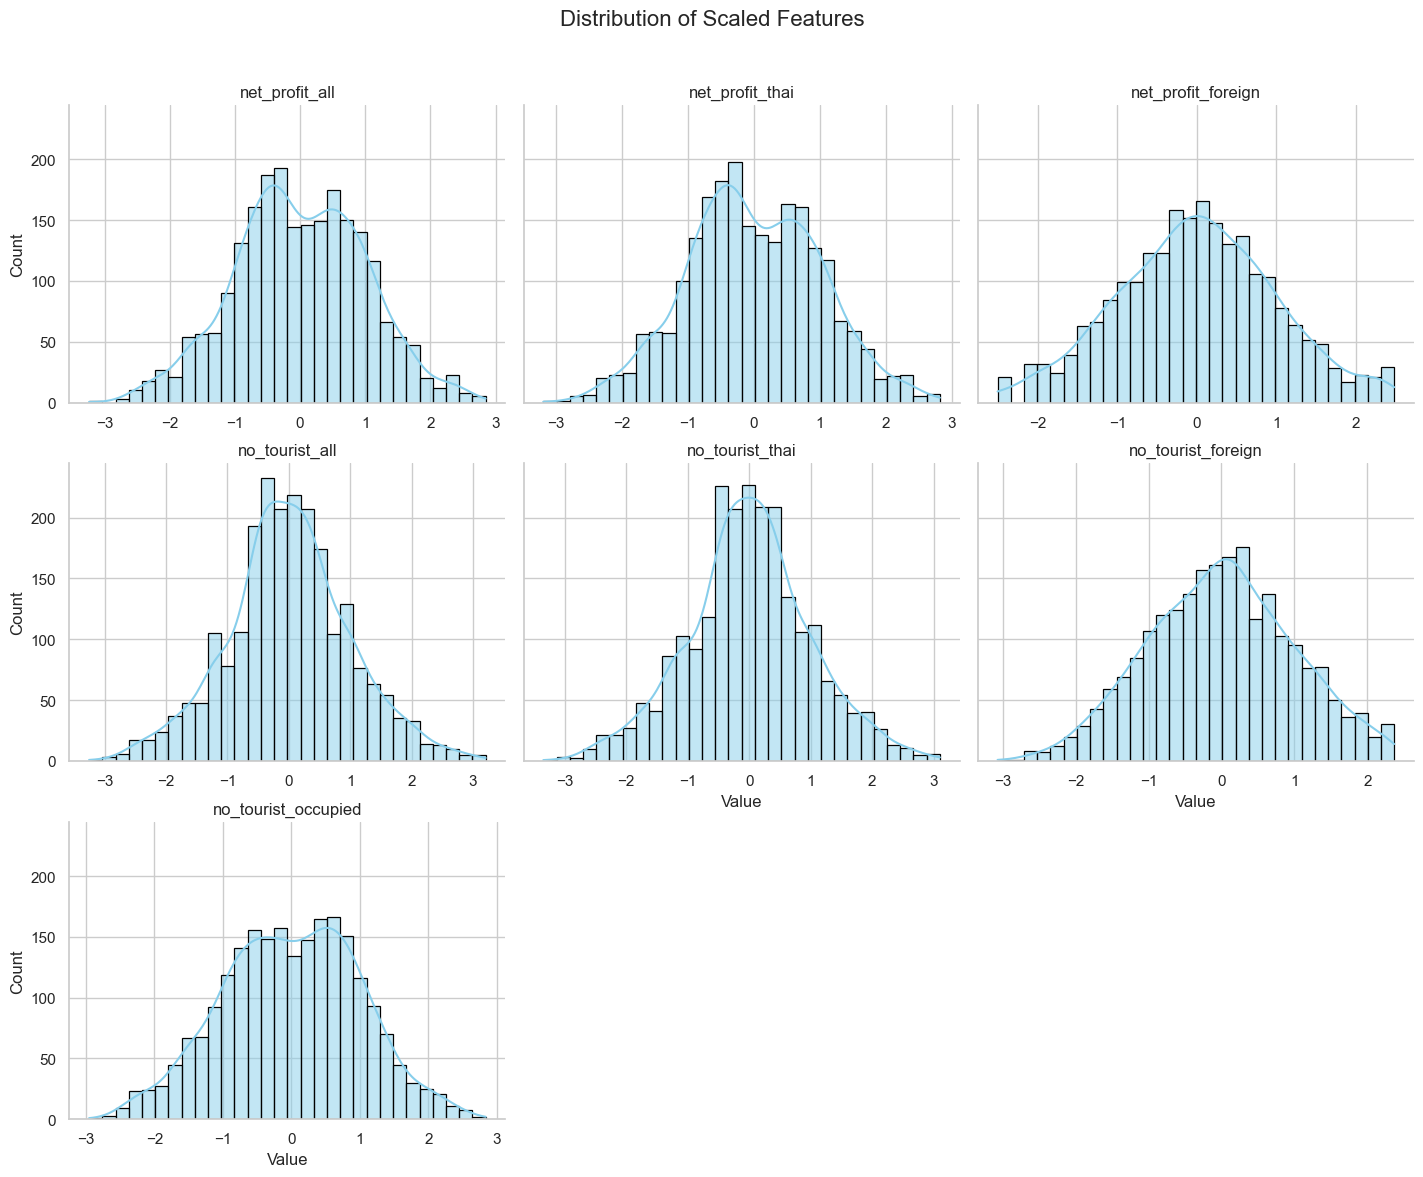

In [152]:
# Combine all scaled features into one DataFrame for melting
scaled_features = scaled_transformed_df[all_scaled]

# Reshape to long format for FacetGrid
melted_df = scaled_features.melt(var_name="Feature", value_name="Value")

# Set Seaborn style for readability
sns.set(style="whitegrid")

# Create FacetGrid
g = sns.FacetGrid(melted_df, col="Feature", col_wrap=3, sharex=False, height=4, aspect=1.2)

# Map histogram with KDE to each subplot
g.map(sns.histplot, "Value", kde=True, bins=30, color="skyblue", edgecolor="black")

# Improve layout and add titles
g.set_titles(col_template="{col_name}", size=12)
g.set_axis_labels("Value", "Count")
g.tight_layout()
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Distribution of Scaled Features", fontsize=16)
plot_all["scaled_distribution_facet_plot"] = g.fig


plt.show()

__*Personal Viewpoint*__: The majority of variable distribution plots remain unchanged even though scaling feature is accounted after Box-Cox transformation, this indicates that the value density has reached its maximum state due to large proportion of outliers removed at the beginning, resulting in imperfect shape. 

#### Feature Distribution After Scaling (Melted Facetplot) ####

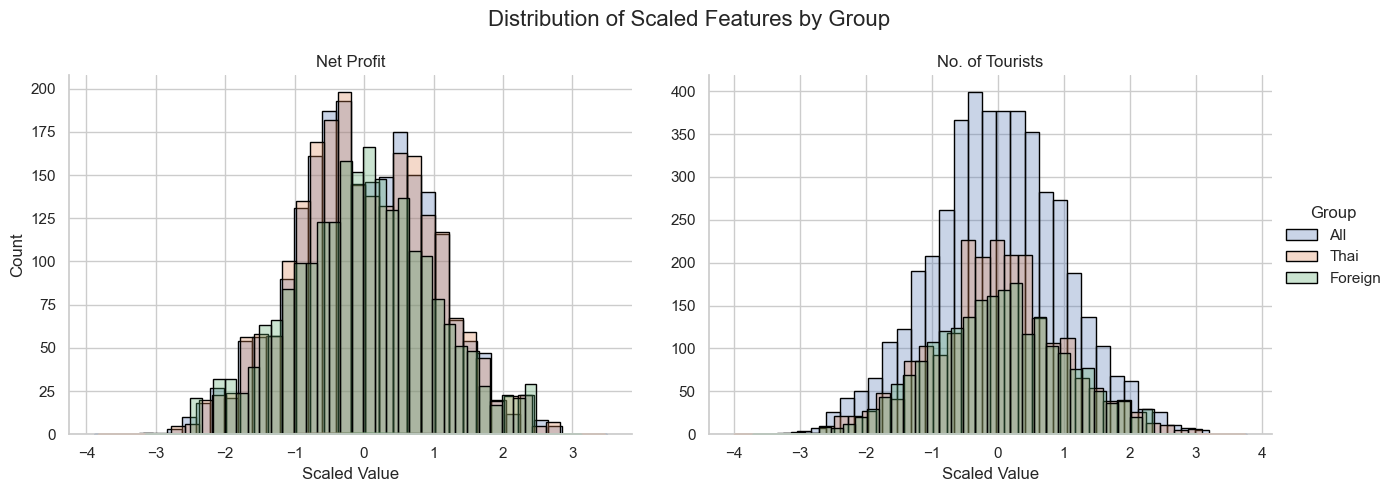

In [154]:
# Define a helper to tag group types from column names
def get_group_type(col_name):
    if "foreign" in col_name:
        return "Foreign"
    elif "thai" in col_name:
        return "Thai"
    else:
        return "All"

# Prepare melted DataFrame
melted_df = scaled_transformed_df[all_scaled].melt(var_name="Feature", value_name="Value")
melted_df["Group"] = melted_df["Feature"].apply(get_group_type)
melted_df["Metric"] = melted_df["Feature"].apply(lambda x: "Net Profit" if "net_profit" in x else "No. of Tourists")

# Set the aesthetic style
sns.set(style="whitegrid")

# Plot using FacetGrid with hue for group
g = sns.FacetGrid(melted_df, col="Metric", hue="Group", height=5, aspect=1.3, sharex=False, sharey=False)

g.map(sns.histplot, "Value", stat="count", bins=30, alpha=0.3, edgecolor="black")
g.map(sns.kdeplot, "Value", fill=True, alpha=0.4, linewidth = 2)

# Set legend, titles, etc.
g.add_legend(title="Group")
g.set_axis_labels("Scaled Value", "Count")
g.set_titles("{col_name}")
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle("Distribution of Scaled Features by Group", fontsize=16)
plot_all["scaled_distribution_melted_plot"] = g.fig
plt.show()

### Savestates ###

For further accessibility, seperated versions of this preprocessed dataset has been provided which offer various uses in Machine Learning field, additionally scientists, business - marketing analysts could be using plotting graphs as references.

#### 1. Interdisciplanary ML Dataset Versions ####

In [156]:
#Time Series
full_prep_df = scaled_transformed_df.copy()
#Regression / Classification
full_prep_no_date_df = scaled_transformed_df.copy().drop(columns = ["date"])

In [158]:
def save_dataset(df, filename, folder = "datasets", formats = []):
    os.makedirs(folder, exist_ok = True)
    for fmt in formats:
        path = os.path.join(folder, f"{filename}.{fmt}")
        if fmt == "csv":
            df.to_csv(path, index = False)
        elif fmt == "parquet":
            df.to_parquet(path, index = False)
        elif fmt == "xlsx":
            df.to_excel(path, index = False)
        print(f"Saving Completed: {filename} -> {fmt}")

In [160]:
save_dataset(full_prep_df, "full_data_with_date", folder="datasets/time_series", formats=["csv"])
save_dataset(full_prep_no_date_df, "ml_data_no_date", folder="datasets/regression", formats=["csv"])

Saving Completed: full_data_with_date -> csv
Saving Completed: ml_data_no_date -> csv


#### 2. All-in-one Visualisation Capture ####

In [162]:
def save_all_figs(fig_dict, folder = "plots", formats = ["png"]):
    os.makedirs(folder, exist_ok = True)
    for name, fig in fig_dict.items():
        if isinstance(fig, matplotlib.figure.Figure):
            for fmt in formats:
                filepath = os.path.join(folder, f"{name}.{fmt}")
                fig.savefig(filepath, bbox_inches = "tight")
        elif isinstance(fig, go.Figure):
            for fmt in formats:
                filepath = os.path.join(folder, f"{name}.{fmt}")
                pio.write_image(fig, filepath)
        else:
            raise NotImplementedError("Invalid figure type. Expected either Matplotlib or Plotly.")
            continue
        print(f"Saving Completed: {name} -> {formats}")

In [164]:
save_all_figs(plot_all)

Saving Completed: revenue_tourist_Chiang Rai_plot -> ['png']
Saving Completed: revenue_tourist_Chiang Mai_plot -> ['png']
Saving Completed: revenue_tourist_Bangkok_plot -> ['png']
Saving Completed: revenue_tourist_Phuket_plot -> ['png']
Saving Completed: revenue_tourist_plot -> ['png']
Saving Completed: covid_19_plot -> ['png']
Saving Completed: regional_heatmap_revenue -> ['png']
Saving Completed: regional_tourists_by_year -> ['png']
Saving Completed: scaled_distribution_facet_plot -> ['png']
Saving Completed: scaled_distribution_melted_plot -> ['png']


### Limitations ###

1. The data interpretation for each tasks could be more profound if providing statistical tests on specific categories:
    - Task 1: Pearson - Spearman correlation, ANOVA/t-test on acommodation popularity
    - Task 2: ANOVA/t-test on comparing revenue/guests across pre and post-COVID
    - Task 3: Consider cluster analysis to identify province features (climate / seasonality, historical buildings), ANOVA on checking the myth that tourist type contributes to high / low revenue
    - Task 4: Should be addressed with external aspects, more like a blend mixture between EDA and social experience
    - Additional Requirements: See the difference between hot-pick tourist attractions and the majority, this hypothesis partially proves that pandemic closures critically affect to the national revenue, which sets up challenges addressing the pure dependency on particular fields.
2. Categorical variables distribution still contains unsymmetric points, slightly skewed curves or unusual shapes such as M-shape / Mountain shape, whereas only no_tourist_all and no_tourist_thai meet up perfect Gaussian distribution. These unusual details might result from the loss of significant outliers represented by revenue / tourists of popular destinations: Bangkok, Phuket,... 
3. Missing savestate of Uthai Thani plot due to unsucessful implementation of kaleido libraries for exporting image.
4. Incompleted explanation of each theme-based graphs, to address this, several key points are provided in the event that spare time is allowed.
5. Heavily-coded data analysis with vision to Data Science, resulting in less informative insights.


### Conclusion & Next Steps ###

This detailed storytelling helps to broaden beyond the numeric values in dataset. This analysis reveals that geographical characteristics significantly influence on total profit, accommodation price. An astonishing economic tourism recovery in post-pandemic is observed alongsides abrupt decreases in Q2-2020 and Q3-2021. Additionally the potential advantages of less well-known province Uthai Thani is explored. For further investigation, predictive factors will lay important groundwork for Machine Learning roles, alongsides minor improvements involving the integration of up-to-date datasets as of 2025.